In [41]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [3]:
import pickle
import glob
# save all tables one by one into separate sav files
tsv_files = glob.glob("*.tsv")
for file in tsv_files:
    print(file)
    pickle.dump(pd.read_table(file,sep="\t",low_memory=False, na_values=["\\N","nan"]),
                open(file[:-4]+".sav","wb"))

title.principals.tsv


In [8]:
DataFrame = pickle.load(open("title.principals.sav","rb"))
DataFrame.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN


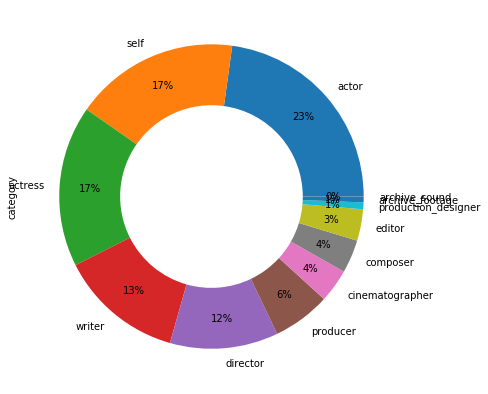

In [10]:
DataFrame.category.value_counts().plot.pie(autopct="%.0f%%", pctdistance=0.8, figzssize=(7,7),
                                                          wedgeprops=dict(width=0.4))

In [11]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42943744 entries, 0 to 42943743
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 1.9+ GB


In [13]:
DataFrame.job.value_counts().plot.pie(autopct="%.0f%%", pctdistance=0.8, figsize=(7,7),
                                                          wedgeprops=dict(width=0.4))

Error in callback <function flush_figures at 0x0000026BB63E5828> (for post_execute):


KeyboardInterrupt: 

In [43]:
DataFrame.category.value_counts().head(50)

actor                  9799247
self                   7512976
actress                7355701
writer                 5651665
director               4939376
producer               2634153
cinematographer        1527177
composer               1513549
editor                 1434187
production_designer     311527
archive_footage         261437
archive_sound             2749
Name: category, dtype: int64

In [23]:
categoryDataFrame = DataFrame.groupby("category")

In [25]:
categoryDataFrame.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
5,tt0000003,1,nm0721526,director,NaN,NaN
6,tt0000003,2,nm1770680,producer,producer,NaN
7,tt0000003,3,nm1335271,composer,NaN,NaN
8,tt0000003,4,nm5442200,editor,NaN,NaN
9,tt0000004,1,nm0721526,director,NaN,NaN


In [45]:
uniqueCategories = pd.unique(DataFrame['category'])

In [46]:
uniqueCategories

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [47]:
uniqueJobs = pd.unique(DataFrame['job'])

In [52]:
uniqueJobs
len(uniqueJobs)

34854

In [49]:
nonuniqueCategories = []
nonuniqueJobs = []

In [50]:
for i in range(len(DataFrame)) : 
  nonuniqueCategories.append(DataFrame.loc[i, "category"])

In [51]:
nonuniqueCategories

['self',
 'director',
 'cinematographer',
 'director',
 'composer',
 'director',
 'producer',
 'composer',
 'editor',
 'director',
 'composer',
 'actor',
 'actor',
 'director',
 'producer',
 'director',
 'actor',
 'actor',
 'director',
 'director',
 'producer',
 'actor',
 'director',
 'cinematographer',
 'actress',
 'actor',
 'actor',
 'director',
 'director',
 'actor',
 'director',
 'self',
 'self',
 'self',
 'self',
 'director',
 'director',
 'self',
 'self',
 'self',
 'self',
 'director',
 'actor',
 'actor',
 'director',
 'director',
 'director',
 'self',
 'self',
 'director',
 'actor',
 'actress',
 'director',
 'director',
 'actor',
 'director',
 'director',
 'director',
 'producer',
 'director',
 'director',
 'self',
 'self',
 'director',
 'producer',
 'director',
 'producer',
 'actor',
 'actor',
 'actor',
 'actor',
 'director',
 'director',
 'self',
 'self',
 'director',
 'self',
 'self',
 'self',
 'director',
 'director',
 'director',
 'director',
 'actress',
 'director',
 'dire

In [ ]:
for i in range(len(DataFrame)) : 
  nonuniqueJobs.append(DataFrame.loc[i, "job"])

In [ ]:
nonuniqueJobs